# Import Library

In [ ]:
import csv
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence

# Import Dataset

In [ ]:
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/ML Project'
%cd $folder_path
!ls
file_name = 'depresi.csv'
!cp "$file_name" "/content"
%cd /content

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ML Project
 depresi.csv   FIX   model   model_1.ipynb  'serenepath (2).h5'
/content


In [ ]:
# def load_data():
#     df = pd.read_csv('/content/depresi.csv')
#     X = df['text'].values
#     y = df['label'].values
#     return X, y

df = pd.read_csv('/content/depresi.csv')

In [ ]:
df.info()

# Distribution of data 'label'
df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27971 entries, 0 to 27970
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27971 non-null  object
 1   label   27971 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.2+ KB


0    14135
1    13836
Name: label, dtype: int64

In [ ]:
display(df.dtypes)
df = df.fillna(0)
df['label'] = df['label'].astype(int)

# Displaying the datatypes
display(df.dtypes)

text     object
label     int64
dtype: object

text     object
label     int64
dtype: object

In [ ]:
df.head()

,text,label
0,PERTANYAAN REMAJA AMERIKA DEAR Orang Belanda m...,0
1,"Tidak ada yang melihat ke depan lifei, jangan ...",1
2,Rekomendasi Musik Saya ingin memperluas daftar...,0
3,Aku sudah selesai mencoba merasa lebih baik al...,1
4,Subjek Gadis Tua Tahun Khawatir Domestik House...,1


In [ ]:
df.tail()

,text,label
27966,memposting sehari -hari orang berhenti merawat...,0
27967,oke pasti perlu mendengar pendapat pria ive cu...,0
27968,tidak bisa mendapatkan anjing berpikir sakit b...,1
27969,whats point putri bridei benar -benar berpikir...,1
27970,Punya telanjang orang mungkin tahu snapchat do...,0


# Install Sastrawi

In [ ]:
!pip install sastrawi

## Data Preprocessing

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import re
#import pickle

def preprocess_text(text):
    # Removes non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    words = text.split()

    # Remove stop words
    stopword_factory = StopWordRemoverFactory()
    stopword_remover = stopword_factory.create_stop_word_remover()
    words = [stopword_remover.remove(word) for word in words]

    # Stemming
    stemmer_factory = StemmerFactory()
    stemmer = stemmer_factory.create_stemmer()
    words = [stemmer.stem(word) for word in words]

    # Recombine processed words
    processed_text = ' '.join(words)

    return processed_text

# with open('preprocess_text.pkl', 'wb') as f:
#      pickle.dump(preprocess_text, f)

# Split Dataset

In [ ]:
#X, y = load_data()

X = df['text'].values
y = df['label'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pd.DataFrame(X_train).to_csv("X_train.csv")
pd.DataFrame(X_test).to_csv("X_test.csv")
pd.DataFrame(y_train).to_csv("y_train.csv")
pd.DataFrame(y_test).to_csv("y_test.csv")

train_data = pd.DataFrame({'text': X_train, 'label': y_train})
train_data.to_csv('train_data.csv', index=False)

test_data = pd.DataFrame({'text': X_test, 'label': y_test})
test_data.to_csv('test_data.csv', index=False)

# Tokenizing

In [ ]:
vocab_size = 3000
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
#tokenizer.fit_on_texts(text_test)

word_index = tokenizer.word_index

# seq_train = tokenizer.texts_to_sequences(text_train)
# padded_train = pad_sequences(seq_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# seq_test = tokenizer.texts_to_sequences(text_test)
# padded_test = pad_sequences(seq_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(sequences_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)
X_test_padded = pad_sequences(sequences_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)

y_train = np.array(y_train)
y_test = np.array(y_test)

print("\nWord Index = " , word_index)
print(f'Train vocabulary size: {len(tokenizer.word_index)}')


Word Index =  {'<OOV>': 1, 'yang': 2, 'tidak': 3, 'saya': 4, 'orang': 5, 'benar': 6, 'seperti': 7, 'ingin': 8, 'tahu': 9, 'baik': 10, 'akan': 11, 'dengan': 12, 'hidup': 13, 'di': 14, 'hal': 15, 'bisa': 16, 'lebih': 17, 'hari': 18, 'teman': 19, 'ada': 20, 'tahun': 21, 'membuat': 22, 'banyak': 23, 'merasa': 24, 'ini': 25, 'pernah': 26, 'berpikir': 27, 'im': 28, 'bahkan': 29, 'mungkin': 30, 'film': 31, 'lagi': 32, 'ive': 33, 'mendapatkan': 34, 'sakit': 35, 'aku': 36, 'waktu': 37, 'mengatakan': 38, 'pergi': 39, 'mencoba': 40, 'melihat': 41, 'diri': 42, 'pun': 43, 'satu': 44, 'buruk': 45, 'apa': 46, 'secara': 47, 'setiap': 48, 'menjadi': 49, 'sesuatu': 50, 'itu': 51, 'terasa': 52, 'seseorang': 53, 'sangat': 54, 'semua': 55, 'lain': 56, 'anak': 57, 'cukup': 58, 'kehidupan': 59, 'mati': 60, 'juga': 61, 'sekolah': 62, 'masih': 63, 'pekerjaan': 64, 'baru': 65, 'mulai': 66, 'membantu': 67, 'selalu': 68, 'kali': 69, 'br': 70, 'bunuh': 71, 'keluarga': 72, 'dapat': 73, 'rumah': 74, 'mereka': 75, '

## Build and Compile Model

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy') > 0.95):
      print(" accuracy > 95% already, stop training!")
      self.model.stop_training = True

In [ ]:
embedding_dim = 128
lstm_dim1 = 32
lstm_dim2 = 64
dense_dim = 32

# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=X_train_padded.shape[1]),
    #tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=None),
    #tf.keras.layers.LSTM(lstm_dim1, activation='relu', return_sequences=True),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim1, return_sequences=True)),
    #tf.keras.layers.LSTM(lstm_dim1, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.LSTM(lstm_dim1, return_sequences=True),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(lstm_dim2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(dense_dim, activation='relu', kernel_regularizer='l2'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

# Set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 128)          384000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 100, 64)           41216     
 onal)                                                           
                                                                 
 lstm_14 (LSTM)              (None, 100, 32)           12416     
                                                                 
 lstm_15 (LSTM)              (None, 64)                24832     
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 flatten_6 (Flatten)         (None, 64)                0         
                                                      

## Train the Model

In [ ]:
batch_size = 256
callbacks = myCallback()
history = model.fit(X_train_padded,
                    y_train,
                    epochs=100,
                    validation_data=(X_test_padded, y_test),
                    verbose=2,
                    callbacks=[callbacks]
)

Epoch 1/100
700/700 - 51s - loss: 0.6424 - accuracy: 0.7280 - val_loss: 0.5174 - val_accuracy: 0.7812 - 51s/epoch - 73ms/step
Epoch 2/100
700/700 - 19s - loss: 0.5181 - accuracy: 0.7854 - val_loss: 0.4934 - val_accuracy: 0.7945 - 19s/epoch - 27ms/step
Epoch 3/100
700/700 - 15s - loss: 0.5115 - accuracy: 0.7797 - val_loss: 0.5336 - val_accuracy: 0.7628 - 15s/epoch - 22ms/step
Epoch 4/100
700/700 - 17s - loss: 0.4426 - accuracy: 0.8260 - val_loss: 0.4131 - val_accuracy: 0.8273 - 17s/epoch - 24ms/step
Epoch 5/100
700/700 - 15s - loss: 0.3987 - accuracy: 0.8462 - val_loss: 0.3690 - val_accuracy: 0.8588 - 15s/epoch - 21ms/step
Epoch 6/100
700/700 - 17s - loss: 0.3538 - accuracy: 0.8661 - val_loss: 0.3393 - val_accuracy: 0.8665 - 17s/epoch - 25ms/step
Epoch 7/100
700/700 - 15s - loss: 0.3193 - accuracy: 0.8820 - val_loss: 0.3439 - val_accuracy: 0.8742 - 15s/epoch - 21ms/step
Epoch 8/100
700/700 - 15s - loss: 0.3277 - accuracy: 0.8868 - val_loss: 0.3269 - val_accuracy: 0.8835 - 15s/epoch - 22

In [ ]:
model.save('serenepath_model_new2.h5')

In [ ]:
#pip install tflite_runtime

In [ ]:
#from tensorflow import lite
#model = tf.keras.models.load_model('serenepath_model.h5')
#converter = lite.TFLiteConverter.from_keras_model(model)
# = converter.convert()
#with open('model.tflite', 'wb') as f:
 #   f.write(tflite_model)

#tf.lite.TFLiteConverter.from_keras_model(model)
#converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
#converter._experimental_lower_tensor_list_ops = False
#tflite_model = converter.convert()
#with open('model.tflite', 'wb') as f:
 # f.write(tflite_model)

from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter=True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
tf.lite.OpsSet.SELECT_TF_OPS]

tfmodel = converter.convert()
open('model.tflite', 'wb').write(tfmodel)

from google.colab import files
files.download('model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

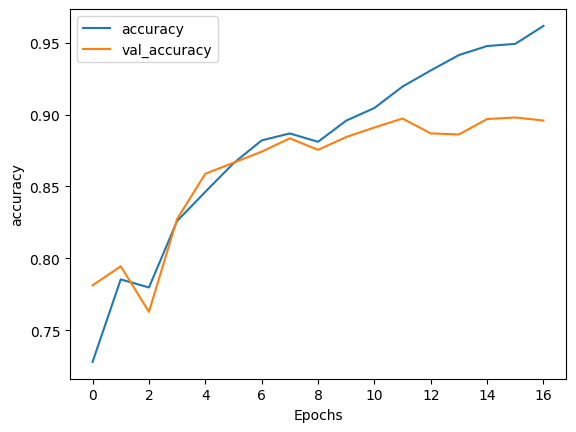

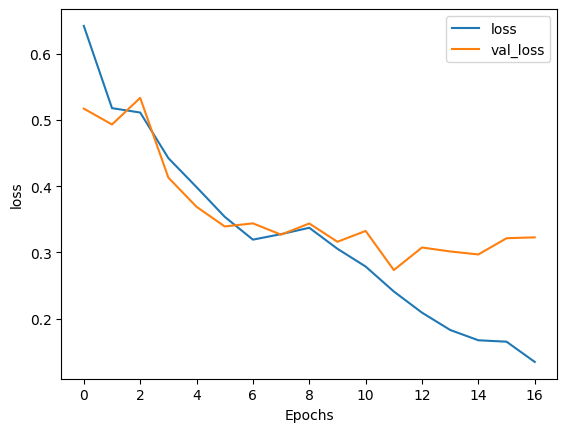

In [ ]:
# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
new_texts = [
    "aku ingin tidur"
    ]

In [ ]:
new_texts_preprocessed = []
for text in new_texts:
    preprocessed_text = preprocess_text(text)
    new_texts_preprocessed.append(preprocessed_text)

new_texts_preprocessed

['aku  tidur']

In [ ]:
sequences = tokenizer.texts_to_sequences(new_texts_preprocessed)

In [ ]:
padded_sequences = pad_sequences(sequences, maxlen=X_test_padded.shape[1])
np.array(padded_sequences)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  36, 102]], dtype=int32)

In [ ]:
threshold = 0.5
predictions = model.predict(padded_sequences)
if predictions > threshold:
  print("depresi")
else:
  print("aman")

print(predictions[0])

1/1 [==============================] - 0s 23ms/step
aman
[0.44636953]
